In [45]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#convert csv to parquet
#import duckdb

#duckdb.sql("""
#    COPY (
#        SELECT *
#        FROM read_csv_auto('eng_data.csv', IGNORE_ERRORS=true)
#    )
#   TO 'eng_data.parquet'
#    (FORMAT 'parquet');
#""")

#load the parquet file in
df = pd.read_parquet("eng_data.parquet")
df.head()

,question_id,question_user_id,question_language,question_content,question_topic,question_sent,response_id,response_user_id,response_language,response_content,...,question_user_country_code,question_user_gender,question_user_dob,question_user_created_at,response_user_type,response_user_status,response_user_country_code,response_user_gender,response_user_dob,response_user_created_at
0,37283088,202215,eng,"Q: Between Pig farming and poultry farming,whi...",pig,2020-02-09 15:52:02.562774+00,37288092,16475,eng,Q3015 chicken,...,ke,male,1981-07-06,2017-05-10 13:32:28+00,farmer,live,ke,female,1977-07-02,2015-09-16 04:38:13+00
1,38346880,134979,eng,Q pregnant cow is supost to be give what kind...,cattle,2020-03-06 11:18:28.946785+00,38357027,33010,eng,"q2169 its call steming up.3months 4 birth,a da...",...,ke,female,1984-03-30,2016-12-07 04:56:22+00,farmer,live,ke,male,1960-11-29,2015-11-10 16:52:00+00
2,39360036,10880,eng,Q if the queen dies in the beehive what wil...,bee,2020-03-31 12:24:04.320909+00,39369541,124973,eng,Q803 The bees try to find another young queen,...,ke,male,1992-11-08,2015-08-07 16:51:55+00,farmer,live,ke,male,1942-03-29,2016-11-20 17:26:36+00
3,39867925,54145,eng,"Q, I'm in need of a dairy goat, anyone or con...",goat,2020-04-07 11:55:10.33466+00,39868355,161453,eng,Q 840 with the many champion farmers and lives...,...,ke,male,1979-02-12,2016-01-27 17:32:05+00,farmer,live,ke,female,1948-08-16,2017-02-18 12:54:10+00
4,43008197,96237,eng,Qwhich maize is good to plant in a black soil,plant,2020-06-04 18:07:45.928548+00,43009097,95801,swa,q924 maindi utaka bolea sio muchaga nyeusi,...,ke,male,1986-04-05,2016-09-18 09:12:10+00,farmer,live,ke,male,1968-02-25,2016-09-12 08:29:23+00


In [46]:
#finding how many unique categories there are in question_topic, and what they are
print(df['question_topic'].unique())
print(df['question_topic'].nunique())

['pig' 'cattle' 'bee' 'goat' 'plant' 'potato' 'garlic' 'mango' 'melon'
 'chicken' 'passion-fruit' 'tree' 'banana' 'animal' 'cabbage' 'crop'
 'eucalyptus' 'pigeon' 'fish' 'maize' 'napier-grass' 'beetroot' 'rice'
 'tomato' 'wheat' 'miraa' 'carrot' 'paw-paw' 'grass' 'watermelon' 'bean'
 'tea' 'livestock' 'sheep' 'pigeon-pea' 'poultry' 'capsicum' 'plantain'
 'pumpkin' 'rabbit' None 'coffee' 'olive' 'cotton' 'peanut' 'avocado'
 'dog' 'pig fattener and pig grow""which is e best to use"' 'french-bean'
 'onion' 'finger-millet' 'kale' 'soya' 'sunflower' 'coconut' 'pea'
 'sweet-potato' 'turkey' 'duck' 'millet' 'cat' 'lucern' 'cassava'
 'vegetable' 'pear' 'sugar-cane' 'yam' 'brachiaria-grass' 'chilli' 'taro'
 'spinach' 'broccoli' 'camel' 'cucumber' 'bird' 'orange' 'macademia'
 'lemon' 'mushroom' 'safflower' 'aubergine' 'okra' 'apple' 'chia' 'peach'
 'pineapple' 'cocoa' 'cereal' 'ginger' 'pyrethrum' 'barley'
 'which is the best variety of maize can give high yields'
 'butternut-squash' 'cowpea' 'g

In [47]:
#running into a problem where the data is unclean, and there are many items that do not belong in the topic area. 
# my plan is to restrict to topics that are one word long
one_word = (
    df['question_topic'].notna()
    & (df['question_topic'].str.strip().str.split().str.len() == 1)
)
df = df[one_word].copy()

In [48]:
#we are getting repeats but they are considered unique because of random punctation or quotation. 
#also im going to remove any numerical entries
df['question_topic_clean'] = (
    df['question_topic']
        .str.lower()
        .str.replace(r'[^a-z\-]', '', regex=True)  
        .str.strip()
)

In [49]:
# we now have a much cleaner set of topics but we still have some values that are not topics. because this is a more manageable set, i will manually remove the non-topics
#define junk topics and remove them
junk_topics = [
    '', '-',           
    'q', 'i', 's',     
    'advice', 'problem',
    'thanks', 'thnks', 'thnx',
    'what', 'where', 'please', 'wayof',
    'jamleck', 'imake', 'random', 'praktikus', 'brand',
    'domanty', 'sprayedafterhowmanydays',
    'doonionstakesonthebeddi', 'lhelpu',
    'kuplantsomewherelikenarok', 'whatistheproblem',
    'wants', 'kashaasha', 'ok', 'muhoroni', 'doodo', 'emikoko', 'nankoma',
    'controlledcured', 'pastoralism', 'goatssheeprespectively', 'cose', 'amashiyo',
]
df = df[~df['question_topic_clean'].isin(junk_topics)].copy()

In [50]:
#now id like to categorize the topics into more general topics so we can visualize the data more cleanly
livestock = {'pig', 'cattle', 'goat', 'sheep', 'rabbit', 'bee', 'camel', 'dog', 'cat',
'cow', 'livestock', 'animal', 'guinea-pig', 'ostrich', 'bird'}
poultry = {'chicken', 'poultry', 'turkey', 'duck', 'guinea-fowl', 'pigeon', 'paultry'}
fish = {'fish', 'tilapia'}
fodder = {'napier-grass', 'brachiaria-grass', 'boma-rhodes', 'grass', 'lucern',
'setaria', 'desmodium', 'clover', 'vetch', 'purple-vetch', 'sudan-grass',
'rye', 'oat'}
tree = {'banana', 'mango', 'paw-paw', 'avocado', 'olive', 'macademia', 'coconut',
'pear', 'orange', 'lemon', 'peach', 'guava', 'jackfruit', 'apricot',
'grape', 'blackberry', 'mulberry', 'cashew-nut', 'bamboo', 'eucalyptus',
'acacia','tree', 'cyprus', 'apple'}
agricultural_input = {'fertilizers', 'weedmaster', 'chemical', 'ph'}
crop_generic = {'crop'}
plant_generic = {'plant', 'tea'}
crop_grain = {'maize', 'rice', 'wheat', 'barley', 'millet', 'finger-millet', 'cereal'}
crop_legume = {'bean', 'pea', 'cowpea', 'chickpea', 'pigeon-pea', 'mung-bean', 'soya',
'french-bean', 'lupin'}
crop_tuber = {'potato', 'potatoes', 'sweet-potato', 'cassava', 'yam', 'taro', 'beetroot',
'carrot'}
crop_vegetable = {'cabbage', 'capsicum', 'cucumber', 'spinach', 'broccoli', 'kale',
'kales', 'collard-greens', 'greens', 'amaranth', 'chard', 'lettuce',
'courgette', 'cauliflower', 'squash', 'butternut-squash', 'aubergine',
'okra', 'radish', 'snow-pea', 'nightshade', 'african-nightshade',
'black-nightshade', 'onion'}
crop_fruit = {'melon', 'watermelon', 'passion-fruit', 'pineapple', 'strawberry', 'pumpkin', 'tomato'}
crop_spice_herb = {'garlic', 'ginger', 'corriander', 'chia', 'pyrethrum'}
crop_oil = {'sesame', 'sunflower', 'safflower', 'rapeseed', 'peanut', 'castor-bean'}
crop_cash = {'cotton', 'tobacco', 'cocoa', 'coffee', 'miraa', 'sugar-cane'}
pest = {'locust'}

#mapping
def assign_topic_group(topic: str) -> str:
    t = str(topic)
    if t in livestock:
        return 'livestock'
    if t in poultry:
        return 'poultry'
    if t in fish:
        return 'fish'
    if t in fodder:
        return 'fodder'
    if t in tree:
        return 'tree'
    if t in agricultural_input:
        return 'agri_input'
    if t in crop_grain:
        return 'crop_cereal'
    if t in crop_legume:
        return 'crop_legume'
    if t in crop_tuber:
        return 'crop_tuber'
    if t in crop_vegetable:
        return 'crop_vegetable'
    if t in crop_fruit:
        return 'crop_fruit'
    if t in crop_spice_herb:
        return 'crop_spiceherb'
    if t in crop_oil:
        return 'crop_oilseed'
    if t in crop_cash:
        return 'crop_cash'
    if t in crop_generic:
        return 'crop_uncategorized'
    if t in plant_generic:
        return 'plant_uncategorized'
    if t in pest:
        return 'pest'
    return 'uncategorized'

#create the topic_group column
df['topic_group'] = df['question_topic_clean'].apply(assign_topic_group)



In [51]:
#removing rows where topic_group = uncategorized
df = df[df['topic_group'] != 'uncategorized']
#remove rows where date/time is unavailable 
df = df[
    df['question_sent'].notna() &
    (df['question_sent'].str.strip() != "")
]

In [52]:
print(df.head(20))
print(len(df))

    question_id  question_user_id question_language  \
0      37283088            202215               eng   
1      38346880            134979               eng   
2      39360036             10880               eng   
3      39867925             54145               eng   
4      43008197             96237               eng   
5      43327157            130281               eng   
6      46875575             71486               eng   
7      29799434             17696               eng   
8      43969806            140486               eng   
9      29402563             16475               eng   
10     30285538             13845               eng   
11     46255281             53683               eng   
12     29595546             56202               eng   
13     30146260              3066               eng   
14      8072028             98228               eng   
15      8146387            114222               eng   
16      7329691             68256               eng   
17      73

In [53]:
#creating three columns (month, year, month_year) based on question_sent date-time data
df['question_sent'] = pd.to_datetime(df['question_sent'], errors='coerce')
df['year'] = df['question_sent'].dt.year
df['month'] = df['question_sent'].dt.month
df['year_month'] = df['question_sent'].dt.to_period('M')
df[['question_sent', 'year', 'month', 'year_month']].head()
df['topic_group'].unique()
#removing rows where we dont have question sent data
df = df[df['year'].notna()].copy()

C:\Users\tough\AppData\Local\Temp\ipykernel_18428\1896211859.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['question_sent'].dt.to_period('M')


In [54]:
#find the range of the time 
df['question_sent'].min(), df['question_sent'].max()

(Timestamp('2018-02-27 17:35:00.088630+0000', tz='UTC'),
 Timestamp('2022-06-21 14:31:25.474665+0000', tz='UTC'))

In [55]:
#mapping groups for charts
crop_groups = [
    'crop_cereal', 'crop_legume', 'crop_tuber',
    'crop_vegetable', 'crop_fruit', 'crop_spiceherb',
    'crop_oilseed', 'crop_cash'
]
tree_groups = ['tree']
animal_groups = ['livestock', 'poultry', 'fish']
input_pest_fodder = ['agri_input', 'pest', 'fodder']

In [65]:
#season bracket at the bottom of the charts below month
def add_season_bracket(ax, start_month, end_month, label, y_offset=-0.04, color="black"):
    # Convert months to axis-fraction coordinates
    x0 = (start_month - 1) / 12
    x1 = (end_month) / 12
    # Draw the bracket line
    ax.annotate(
        "",
        xy=(x0, y_offset),
        xytext=(x1, y_offset),
        xycoords=("axes fraction"),
        textcoords=("axes fraction"),
        arrowprops=dict(arrowstyle="-", lw=2, color=color)
    )
    # Draw the label just slightly below the bracket
    ax.text(
        (x0 + x1) / 2,
        y_offset - 0.04,
        label,
        ha="center",
        va="top",
        transform=ax.transAxes,
        fontsize=10,
        color=color
    )

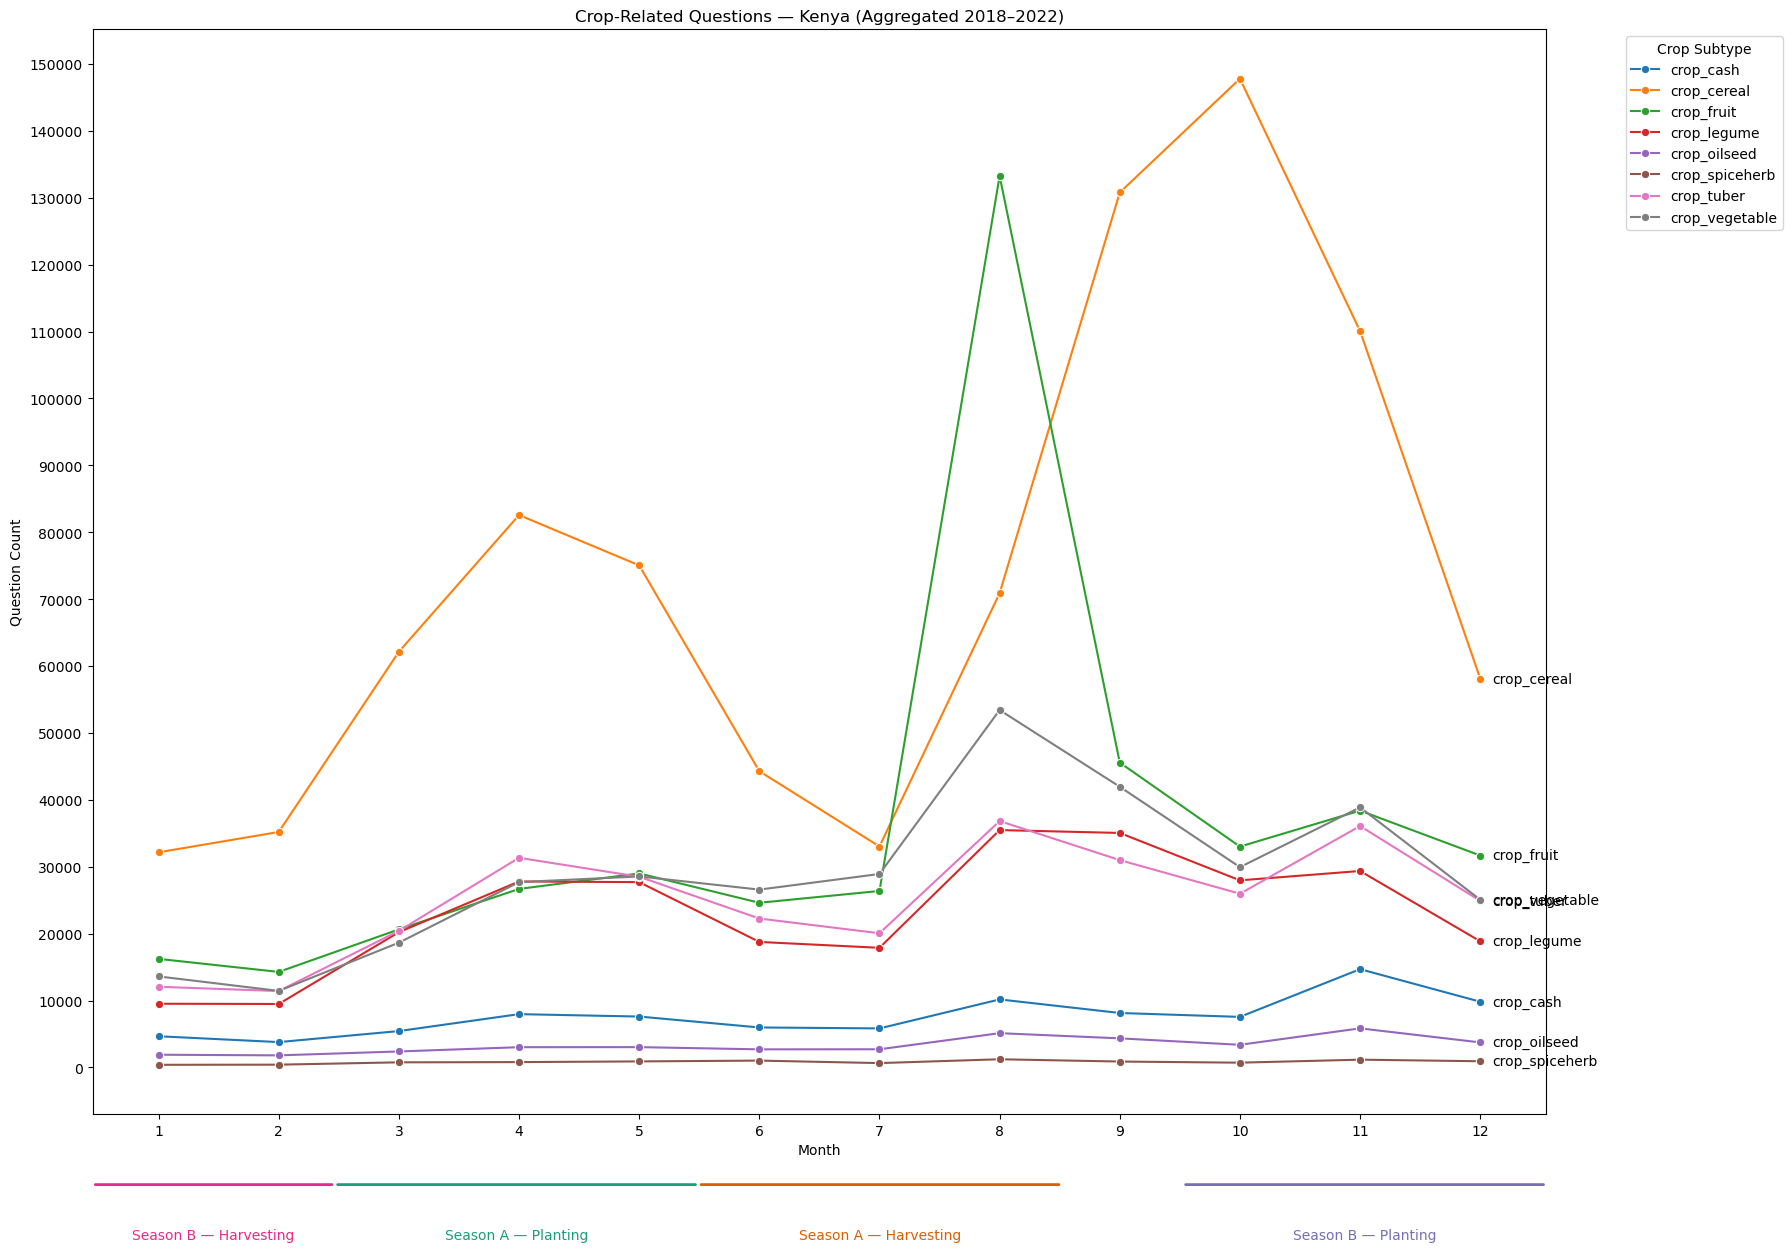

In [ ]:
# monthly kenya crop graph from Feb2018-Jun2022
df_kenya_crops = df[
    (df['question_user_country_code'] == 'ke') &
    (df['topic_group'].isin(crop_groups)) &
    (df['month'].notna())
].copy()
monthly_kenya_crops = (
    df_kenya_crops.groupby(['topic_group', 'month'])
                  .size()
                  .reset_index(name='count')
)
# Plot
fig, ax = plt.subplots(figsize=(18, 14))
sns.lineplot(
    data=monthly_kenya_crops,
    x='month',
    y='count',
    hue='topic_group',
    marker='o',
    ax=ax
)
plt.title("Crop-Related Questions — Kenya (Aggregated 2018–2022)")
plt.xlabel("Month")
plt.ylabel("Question Count")
plt.yticks(np.arange(0, monthly_kenya_crops['count'].max() + 10000, 10000))
plt.xticks(range(1, 13))
# Direct labels
for tg in monthly_kenya_crops['topic_group'].unique():
    tg_data = monthly_kenya_crops[monthly_kenya_crops['topic_group'] == tg]
    last_row = tg_data.sort_values("month").iloc[-1]
    plt.text(
        last_row['month'] + 0.1,
        last_row['count'],
        tg,
        fontsize=10,
        va='center'
    )

# --- Kenya seasonal brackets (Season A / Season B) ---
# Season A — Planting (Long Rains: Mar–May)
add_season_bracket(ax, 3, 5, "Season A — Planting", y_offset=-0.065, color="#1b9e77")
# Season A — Harvesting (Jun–Aug)
add_season_bracket(ax, 6, 8, "Season A — Harvesting", y_offset=-0.065, color="#d95f02")
# Season B — Planting (Short Rains: Oct–Dec)
add_season_bracket(ax, 10, 12, "Season B — Planting", y_offset=-0.065, color="#7570b3")
# Season B — Harvesting (Jan–Feb)
add_season_bracket(ax, 1, 2, "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
plt.legend(title="Crop Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()


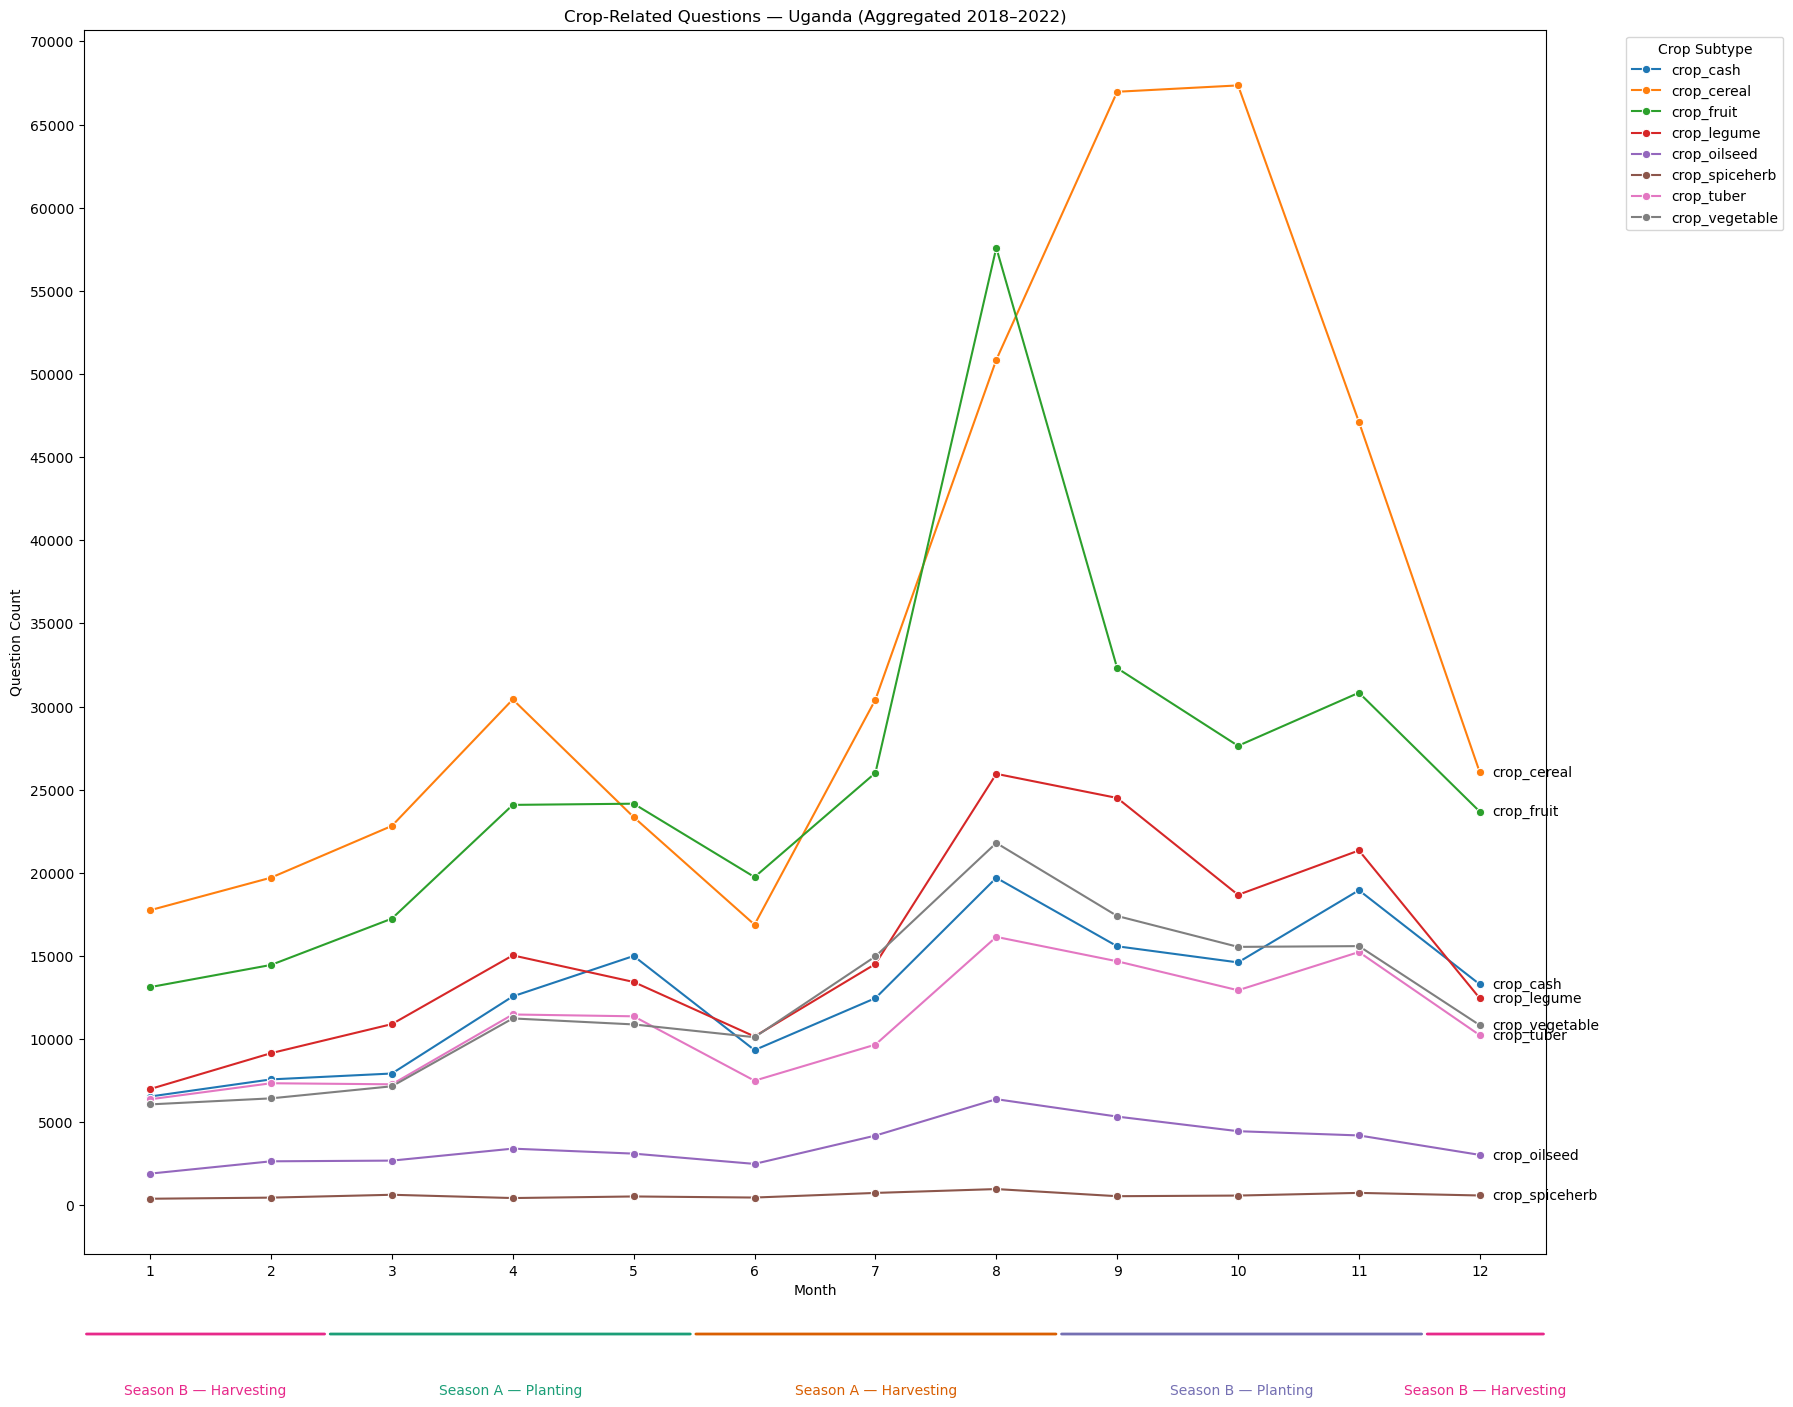

In [ ]:
# monthly uganda crop graph from Feb2018-Jun2022
# --- Ensure date columns exist ---
df['question_sent'] = pd.to_datetime(df['question_sent'], errors='coerce')
df['month'] = df['question_sent'].dt.month
df['year'] = df['question_sent'].dt.year
# --- Filter Uganda crop data ---
df_uganda_crops = df[
    (df['question_user_country_code'] == 'ug') &
    (df['topic_group'].isin(crop_groups)) &
    (df['month'].notna())
].copy()
# --- Aggregate by month ---
monthly_uganda_crops = (
    df_uganda_crops.groupby(['topic_group', 'month'])
                   .size()
                   .reset_index(name='count')
)
# --- Plot ---
fig, ax = plt.subplots(figsize=(18, 14))

sns.lineplot(
    data=monthly_uganda_crops,
    x='month',
    y='count',
    hue='topic_group',
    marker='o',
    ax=ax
)
# --- Labels & Titles ---
plt.title("Crop-Related Questions — Uganda (Aggregated 2018–2022)")
plt.xlabel("Month")
plt.ylabel("Question Count")
plt.xticks(range(1, 13))
plt.yticks(np.arange(0, monthly_uganda_crops['count'].max() + 5000, 5000))
# --- Direct labels on line ends ---
for tg in monthly_uganda_crops['topic_group'].unique():
    tg_data = monthly_uganda_crops[monthly_uganda_crops['topic_group'] == tg]
    last_row = tg_data.sort_values("month").iloc[-1]

    ax.text(
        last_row['month'] + 0.1,
        last_row['count'],
        tg,
        fontsize=10,
        va='center'
    )
# --- Uganda seasonal brackets (all at same height) ---
add_season_bracket(ax, 3, 5,  "Season A — Planting",   y_offset=-0.065, color="#1b9e77")
add_season_bracket(ax, 6, 8,  "Season A — Harvesting", y_offset=-0.065, color="#d95f02")
add_season_bracket(ax, 9, 11, "Season B — Planting",   y_offset=-0.065, color="#7570b3")
# Season B Harvest spans Dec → Feb
add_season_bracket(ax, 12, 12, "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
add_season_bracket(ax, 1,  2,  "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
# --- Legend & layout ---
plt.legend(title="Crop Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  
plt.show()

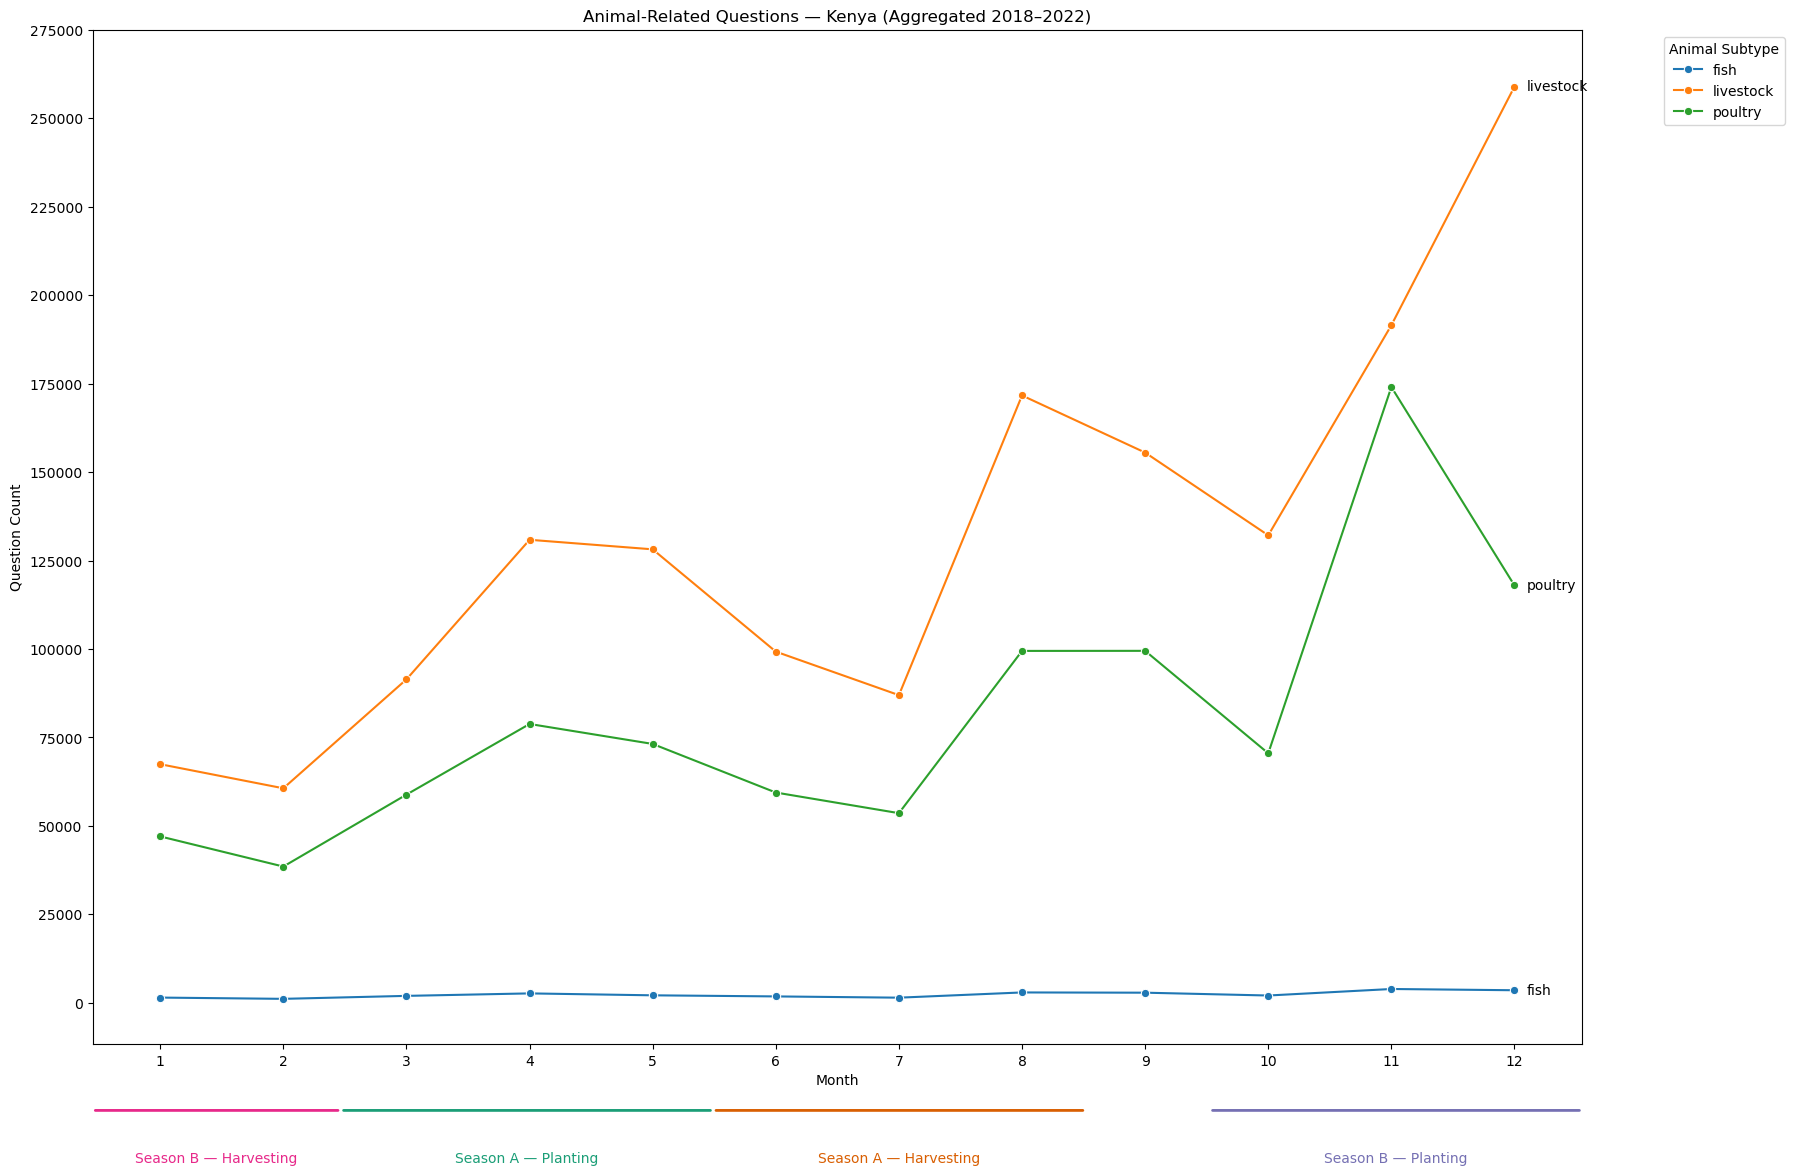

In [ ]:
# monthly kenya animal graph from Feb2018–Jun2022
df_kenya_animals = df[
    (df['question_user_country_code'] == 'ke') &
    (df['topic_group'].isin(animal_groups)) &
    (df['month'].notna())
].copy()

monthly_kenya_animals = (
    df_kenya_animals.groupby(['topic_group', 'month'])
                    .size()
                    .reset_index(name='count')
)
# Plot
fig, ax = plt.subplots(figsize=(18, 14))
sns.lineplot(
    data=monthly_kenya_animals,
    x='month',
    y='count',
    hue='topic_group',
    marker='o',
    ax=ax 
)
plt.title("Animal-Related Questions — Kenya (Aggregated 2018–2022)")
plt.xlabel("Month")
plt.ylabel("Question Count")
plt.yticks(np.arange(0, monthly_kenya_animals['count'].max() + 25000, 25000))
plt.xticks(range(1, 13))
# Direct labels
for tg in monthly_kenya_animals['topic_group'].unique():
    tg_data = monthly_kenya_animals[monthly_kenya_animals['topic_group'] == tg]
    last_row = tg_data.sort_values("month").iloc[-1]
    ax.text(
        last_row['month'] + 0.1,
        last_row['count'],
        tg,
        fontsize=10,
        va='center'
    )

# --- Kenya Seasonality Brackets (Season A & B) ---
# Season A — Planting (Long Rains: Mar–May)
add_season_bracket(ax, 3, 5, "Season A — Planting", y_offset=-0.065, color="#1b9e77")
# Season A — Harvesting (Jun–Aug)
add_season_bracket(ax, 6, 8, "Season A — Harvesting", y_offset=-0.065, color="#d95f02")
# Season B — Planting (Short Rains: Oct–Dec)
add_season_bracket(ax, 10, 12, "Season B — Planting", y_offset=-0.065, color="#7570b3")
# Season B — Harvesting (Jan–Feb)
add_season_bracket(ax, 1, 2, "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
plt.legend(title="Animal Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

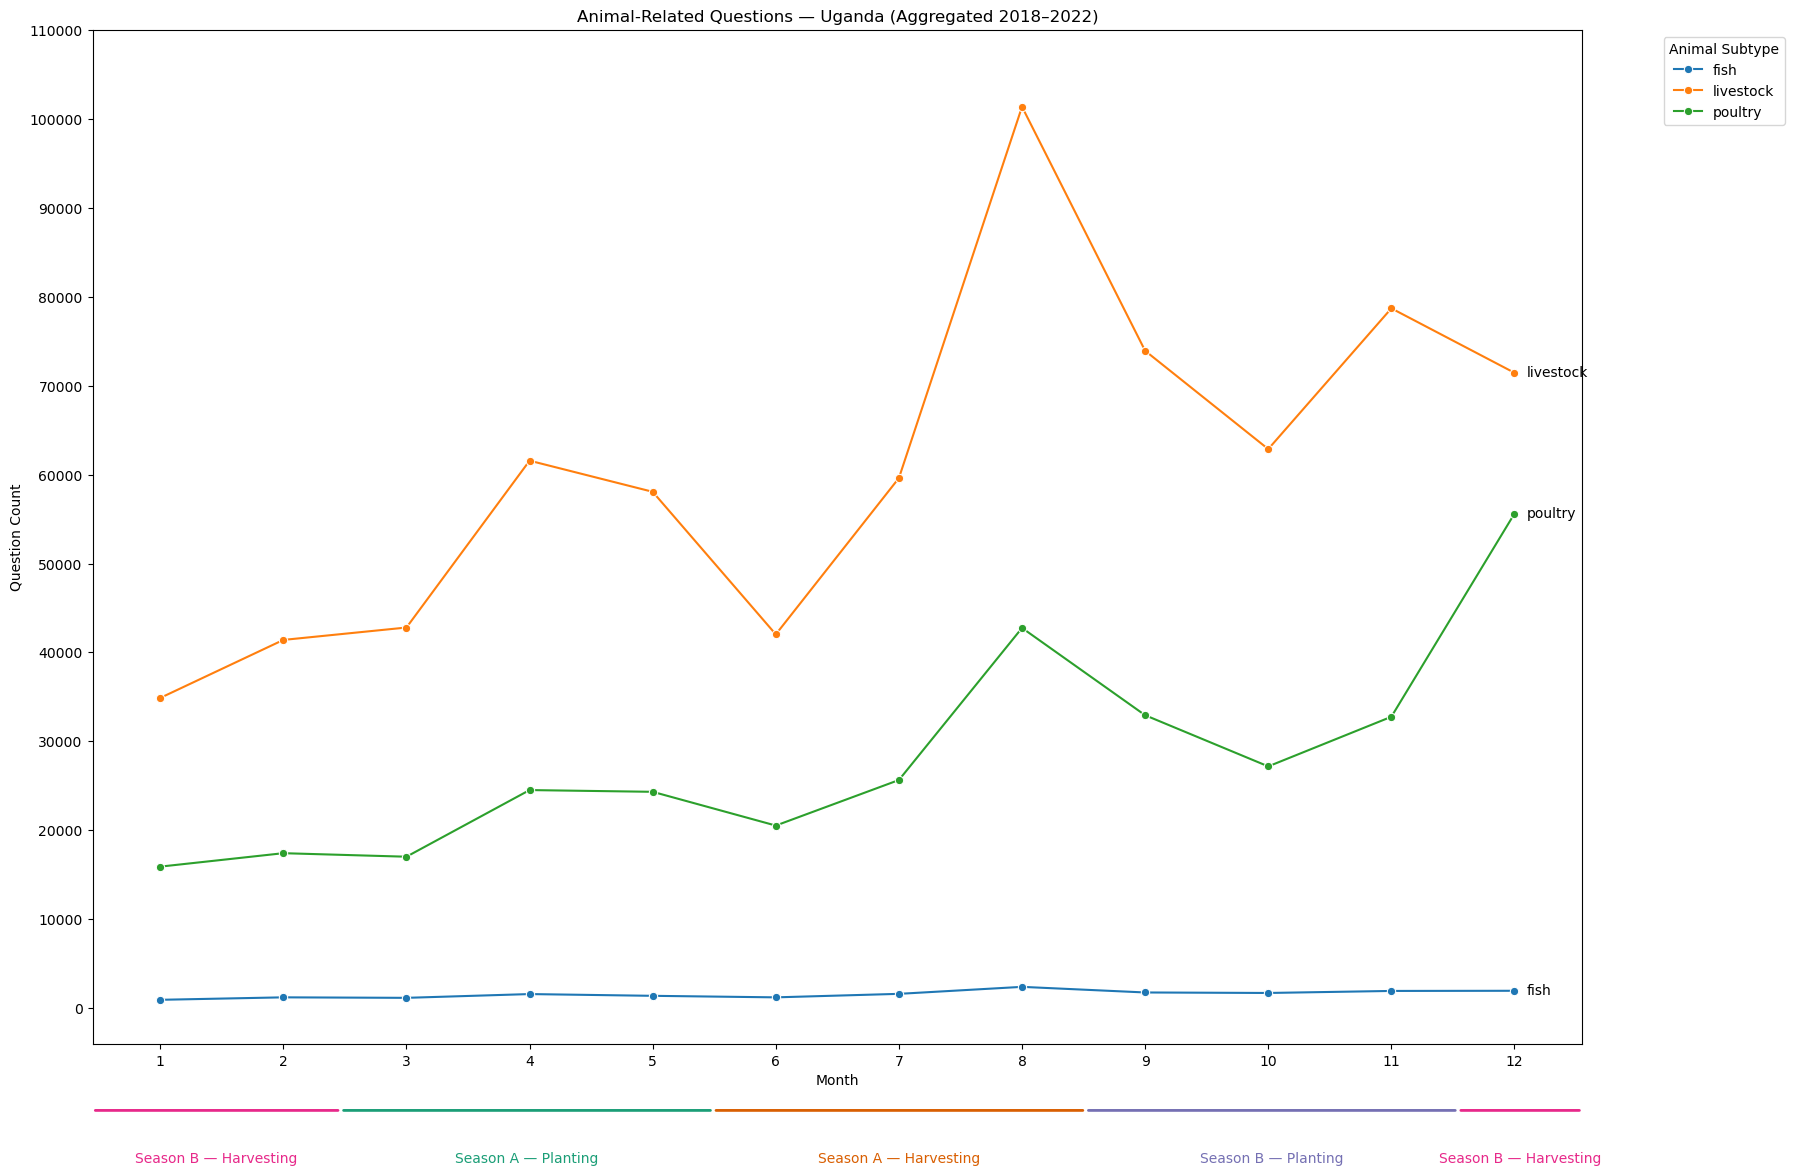

In [ ]:
# monthly uganda animal graph from Feb2018–Jun2022
df_uganda_animals = df[
    (df['question_user_country_code'] == 'ug') &
    (df['topic_group'].isin(animal_groups)) &
    (df['month'].notna())
].copy()
monthly_uganda_animals = (
    df_uganda_animals.groupby(['topic_group', 'month'])
                     .size()
                     .reset_index(name='count')
)
# Plot
fig, ax = plt.subplots(figsize=(18, 14))
sns.lineplot(
    data=monthly_uganda_animals,
    x='month',
    y='count',
    hue='topic_group',
    marker='o',
    ax=ax
)
plt.title("Animal-Related Questions — Uganda (Aggregated 2018–2022)")
plt.xlabel("Month")
plt.ylabel("Question Count")
plt.yticks(np.arange(0, monthly_uganda_animals['count'].max() + 10000, 10000))
plt.xticks(range(1, 13))
# Direct labels
for tg in monthly_uganda_animals['topic_group'].unique():
    tg_data = monthly_uganda_animals[monthly_uganda_animals['topic_group'] == tg]
    last_row = tg_data.sort_values("month").iloc[-1]
    plt.text(
        last_row['month'] + 0.1,
        last_row['count'],
        tg,
        fontsize=10,
        va='center'
    )
# --- Uganda seasonal brackets (all at same height) ---
add_season_bracket(ax, 3, 5,  "Season A — Planting",   y_offset=-0.065, color="#1b9e77")
add_season_bracket(ax, 6, 8,  "Season A — Harvesting", y_offset=-0.065, color="#d95f02")
add_season_bracket(ax, 9, 11, "Season B — Planting",   y_offset=-0.065, color="#7570b3")
# Season B Harvest spans Dec → Feb
add_season_bracket(ax, 12, 12, "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
add_season_bracket(ax, 1,  2, "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
plt.legend(title="Animal Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

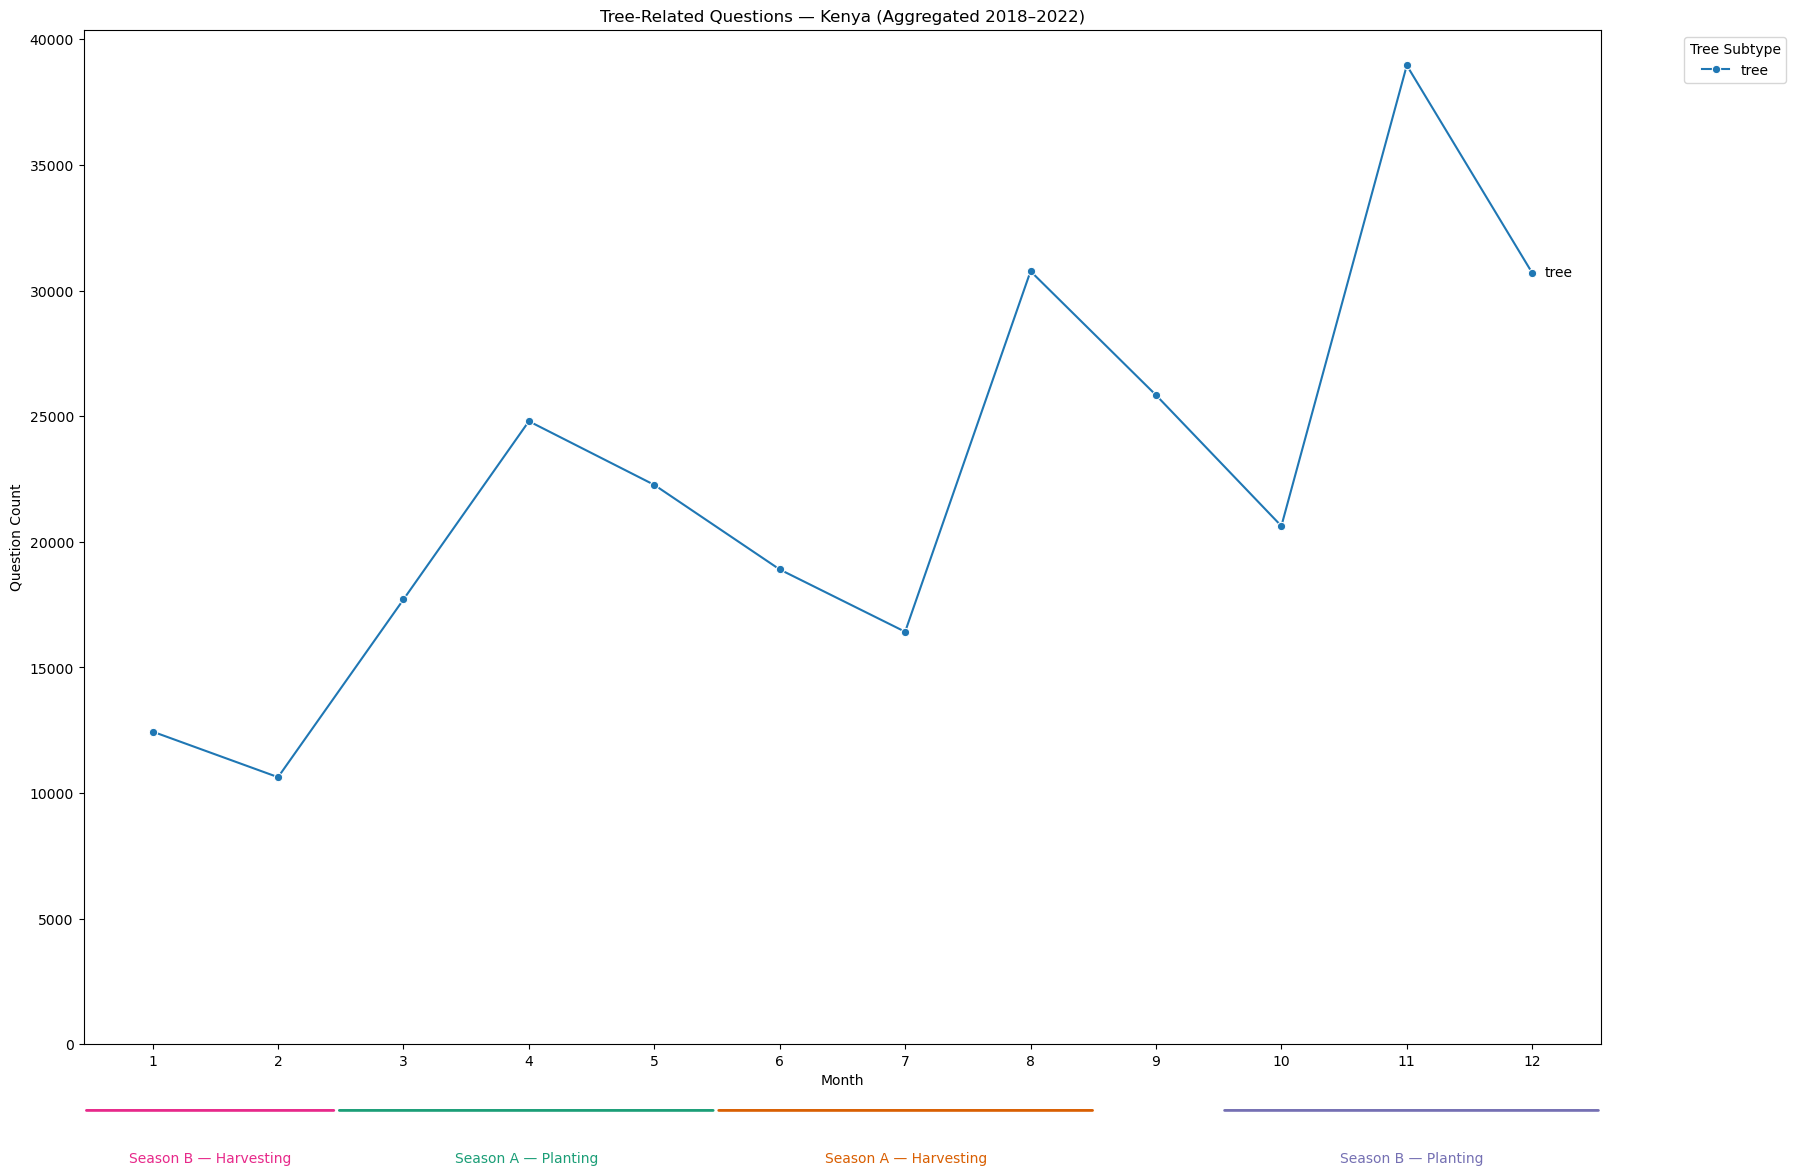

In [ ]:
# monthly kenya tree graph from Feb2018-Jun2022
# Filter Kenya tree data
df_kenya_tree = df[
    (df['question_user_country_code'] == 'ke') &
    (df['topic_group'].isin(tree_groups)) &
    (df['month'].notna())
].copy()
# Aggregate
monthly_kenya_tree = (
    df_kenya_tree.groupby(['topic_group', 'month'])
                 .size()
                 .reset_index(name='count')
)
# Plot
fig, ax = plt.subplots(figsize=(18, 14))
sns.lineplot(
    data=monthly_kenya_tree,
    x='month',
    y='count',
    hue='topic_group',
    marker='o',
    ax=ax
)
plt.title("Tree-Related Questions — Kenya (Aggregated 2018–2022)")
plt.xlabel("Month")
plt.ylabel("Question Count")
plt.xticks(range(1, 13))
import numpy as np
plt.yticks(np.arange(0, monthly_kenya_tree['count'].max() + 5000, 5000))
# Direct labels
for tg in monthly_kenya_tree['topic_group'].unique():
    tg_data = monthly_kenya_tree[monthly_kenya_tree['topic_group'] == tg]
    last_row = tg_data.sort_values("month").iloc[-1]

    ax.text(
        last_row['month'] + 0.1,
        last_row['count'],
        tg,
        fontsize=10,
        va='center'
    )

# --- Kenya Seasonality Brackets (Season A / Season B) ---
# Season A — Planting (Long Rains: Mar–May)
add_season_bracket(ax, 3, 5, "Season A — Planting", y_offset=-0.065, color="#1b9e77")
# Season A — Harvesting (Jun–Aug)
add_season_bracket(ax, 6, 8, "Season A — Harvesting", y_offset=-0.065, color="#d95f02")
# Season B — Planting (Short Rains: Oct–Dec)
add_season_bracket(ax, 10, 12, "Season B — Planting", y_offset=-0.065, color="#7570b3")
# Season B — Harvesting (Jan–Feb)
add_season_bracket(ax, 1, 2, "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
plt.legend(title="Tree Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

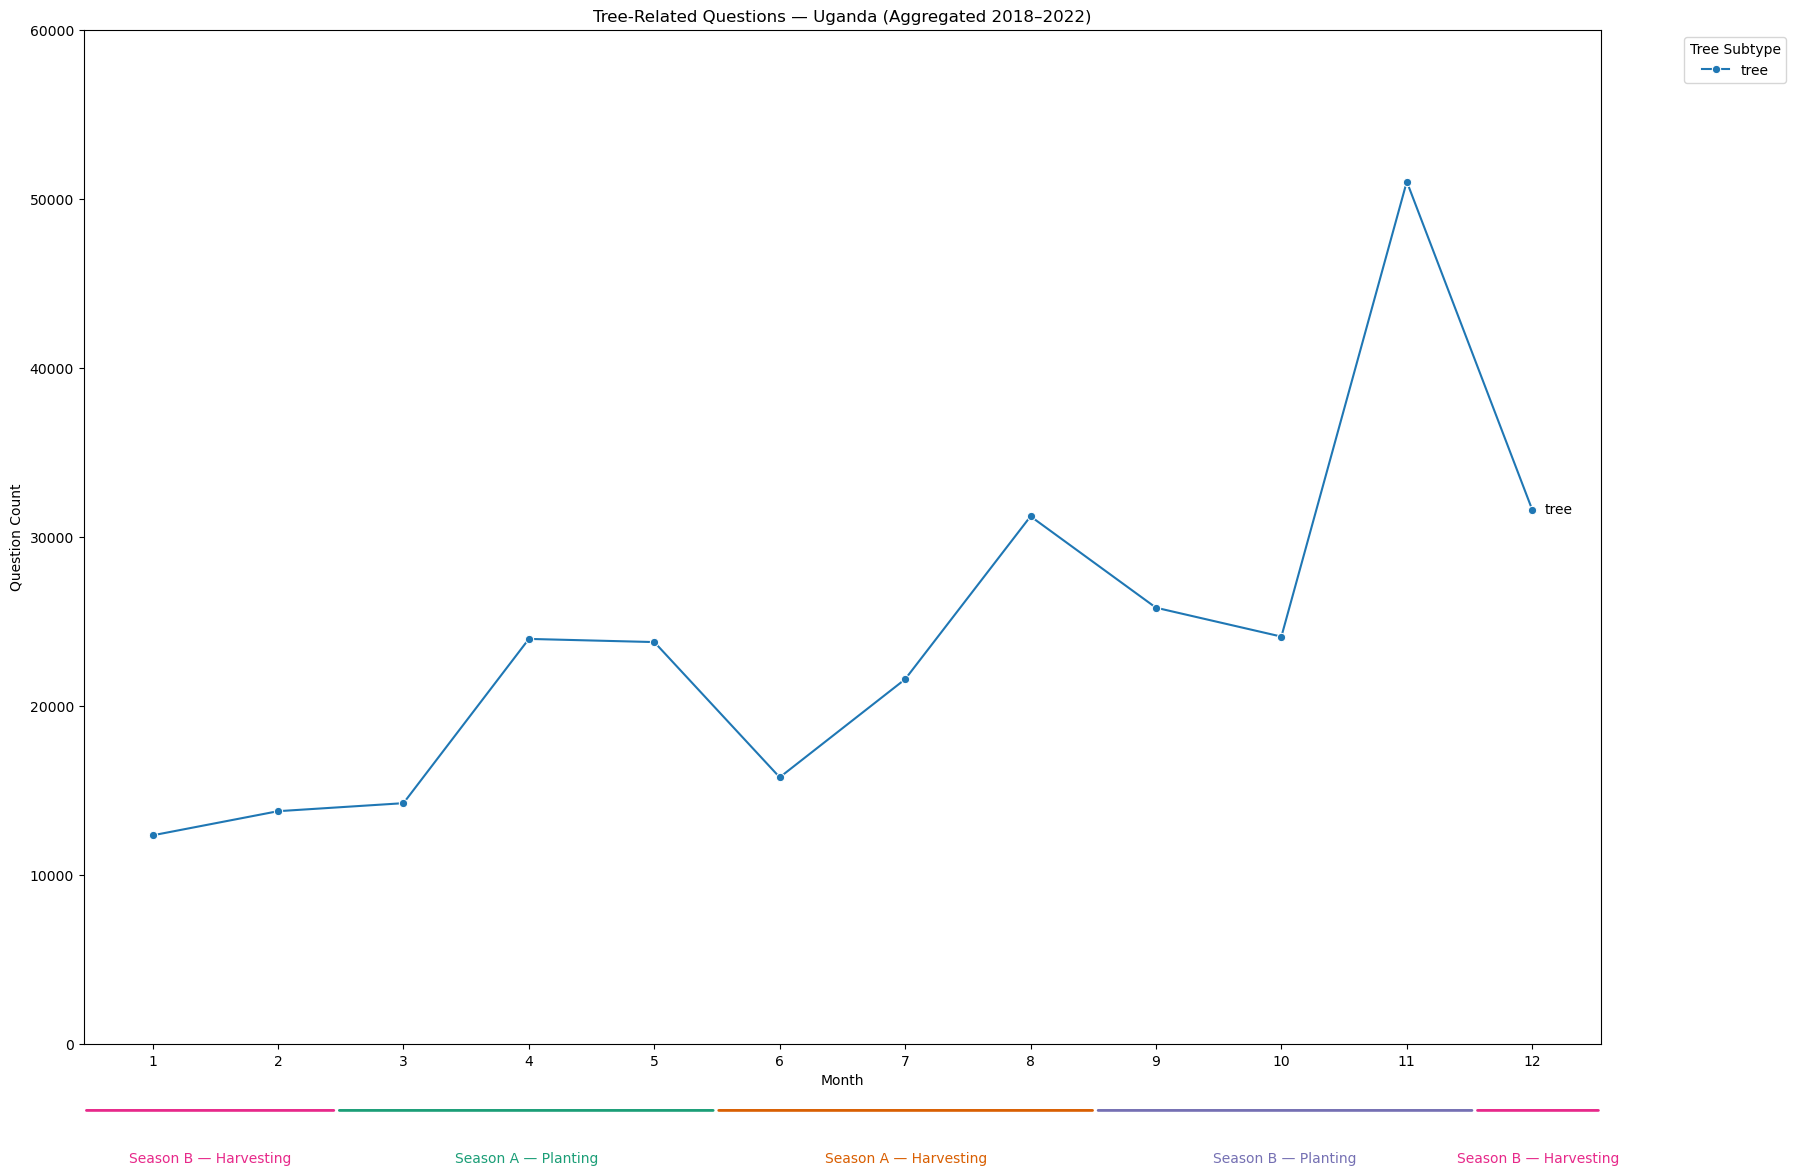

In [ ]:
# monthly uganda tree graph from Feb2018-Jun2022
# Filter Uganda tree data
df_uganda_tree = df[
    (df['question_user_country_code'] == 'ug') &
    (df['topic_group'].isin(tree_groups)) &
    (df['month'].notna())
].copy()
# Aggregate
monthly_uganda_tree = (
    df_uganda_tree.groupby(['topic_group', 'month'])
                  .size()
                  .reset_index(name='count')
)
# Plot
fig, ax = plt.subplots(figsize=(18, 14))
sns.lineplot(
    data=monthly_uganda_tree,
    x='month',
    y='count',
    hue='topic_group',
    marker='o',
    ax=ax
)
plt.title("Tree-Related Questions — Uganda (Aggregated 2018–2022)")
plt.xlabel("Month")
plt.ylabel("Question Count")
plt.xticks(range(1, 13))
# Y-axis ticks every 10,000 
import numpy as np
plt.yticks(np.arange(0, monthly_uganda_tree['count'].max() + 10000, 10000))
# --- Direct labels ---
for tg in monthly_uganda_tree['topic_group'].unique():

    tg_data = monthly_uganda_tree[monthly_uganda_tree['topic_group'] == tg]
    last_row = tg_data.sort_values("month").iloc[-1]

    plt.text(
        last_row['month'] + 0.1,
        last_row['count'],
        tg,
        fontsize=10,
        va='center'
    )
# --- Uganda seasonal brackets (all at same height) ---
add_season_bracket(ax, 3, 5,  "Season A — Planting",   y_offset=-0.065, color="#1b9e77")
add_season_bracket(ax, 6, 8,  "Season A — Harvesting", y_offset=-0.065, color="#d95f02")
add_season_bracket(ax, 9, 11, "Season B — Planting",   y_offset=-0.065, color="#7570b3")
# Season B Harvest spans Dec → Feb
add_season_bracket(ax, 12, 12, "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
add_season_bracket(ax, 1,  2,  "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
plt.legend(title="Tree Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

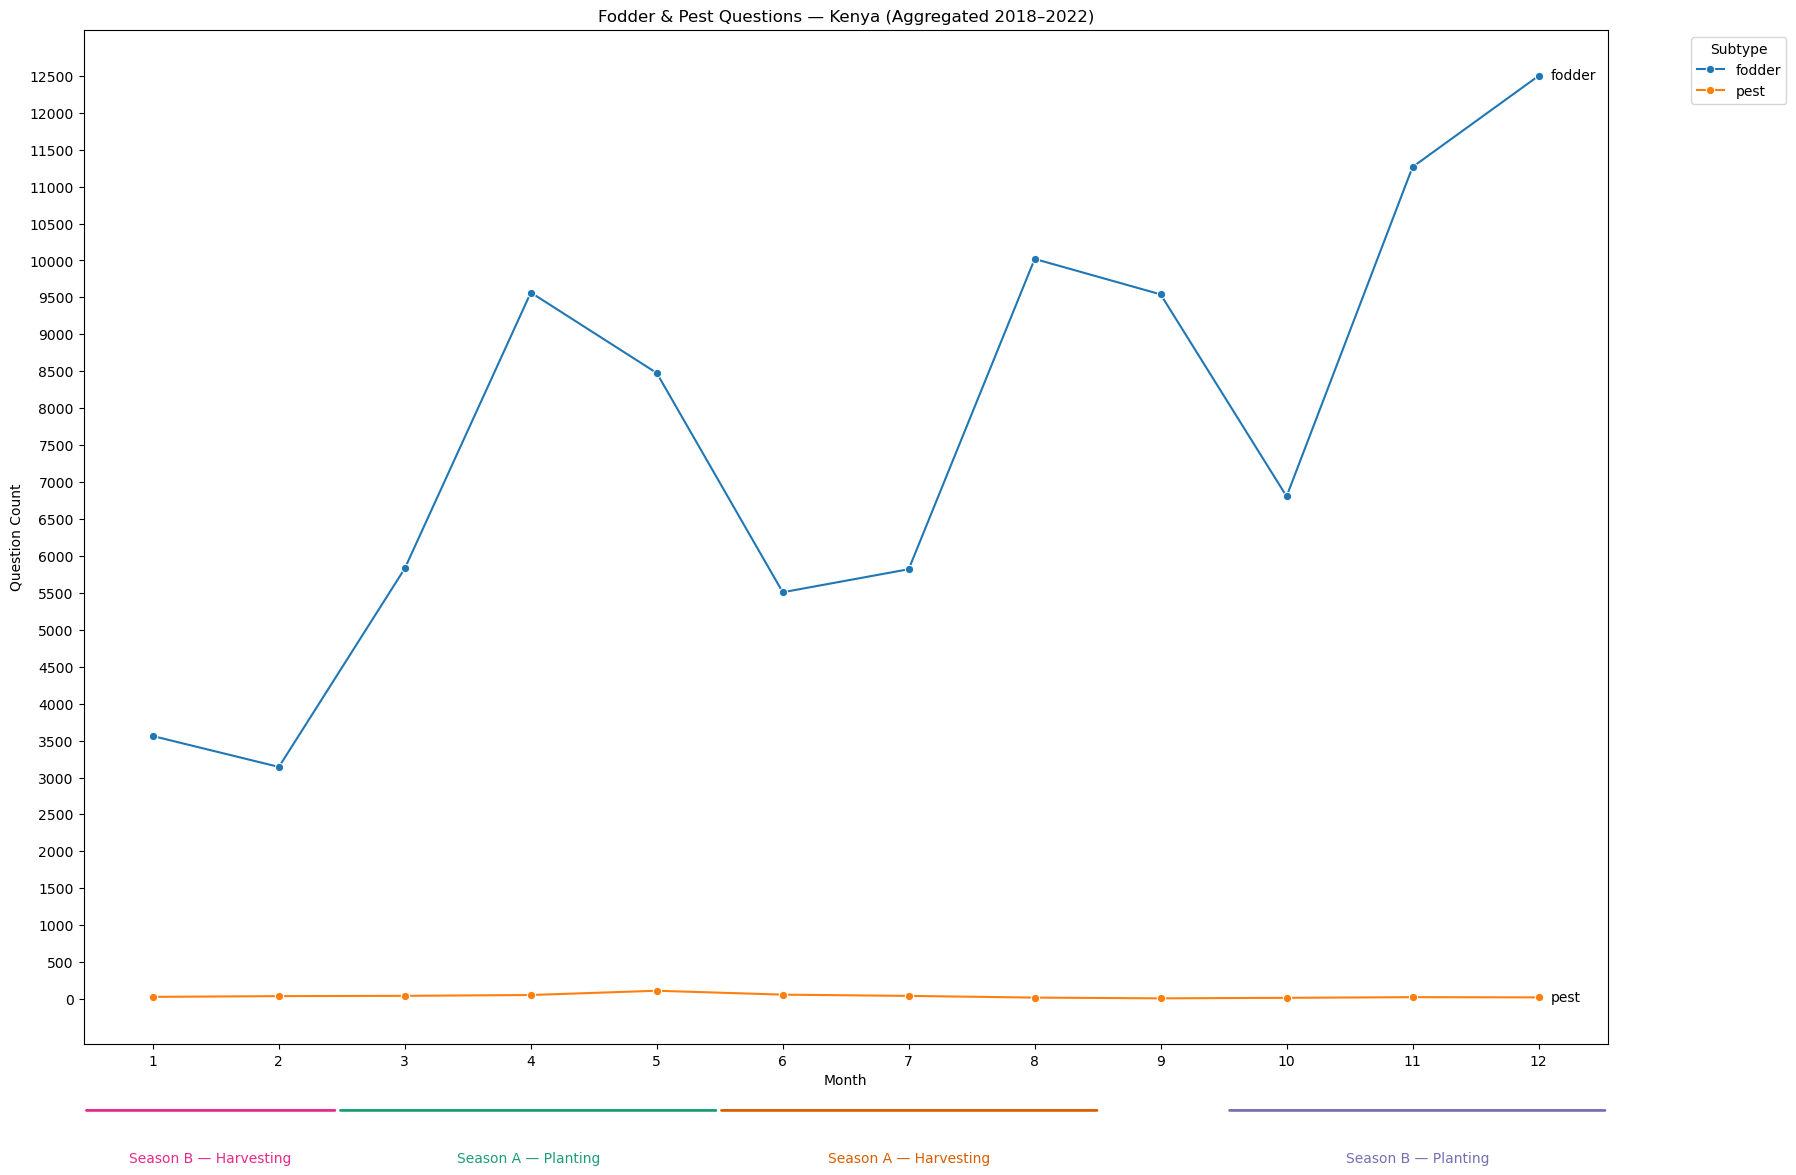

In [ ]:
# monthly kenya fodder/pest from Feb2018-Jun2022
# Filter Kenya pest/fodder data
df_kenya_ipf = df[
    (df['question_user_country_code'] == 'ke') &
    (df['topic_group'].isin(input_pest_fodder)) &
    (df['month'].notna())
].copy()
# Aggregate
monthly_kenya_ipf = (
    df_kenya_ipf.groupby(['topic_group', 'month'])
                .size()
                .reset_index(name='count')
)
# Plot
fig, ax = plt.subplots(figsize=(18, 14))
sns.lineplot(
    data=monthly_kenya_ipf,
    x='month',
    y='count',
    hue='topic_group',
    marker='o',
    ax=ax
)
plt.title("Fodder & Pest Questions — Kenya (Aggregated 2018–2022)")
plt.xlabel("Month")
plt.ylabel("Question Count")
plt.xticks(range(1, 13))
plt.yticks(np.arange(0, monthly_kenya_ipf['count'].max() + 500, 500))
# --- Direct labels ---
for tg in monthly_kenya_ipf['topic_group'].unique():
    tg_data = monthly_kenya_ipf[monthly_kenya_ipf['topic_group'] == tg]
    last_row = tg_data.sort_values("month").iloc[-1]
    ax.text(
        last_row['month'] + 0.1,
        last_row['count'],
        tg,
        fontsize=10,
        va='center'
    )
# --- Kenya Seasonality Brackets (Season A & Season B) ---
# Season A — Planting (Long Rains: Mar–May)
add_season_bracket(ax, 3, 5, "Season A — Planting", y_offset=-0.065, color="#1b9e77")
# Season A — Harvesting (Jun–Aug)
add_season_bracket(ax, 6, 8, "Season A — Harvesting", y_offset=-0.065, color="#d95f02")
# Season B — Planting (Short Rains: Oct–Dec)
add_season_bracket(ax, 10, 12, "Season B — Planting", y_offset=-0.065, color="#7570b3")
# Season B — Harvesting (Jan–Feb)
add_season_bracket(ax, 1, 2, "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
plt.legend(title="Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

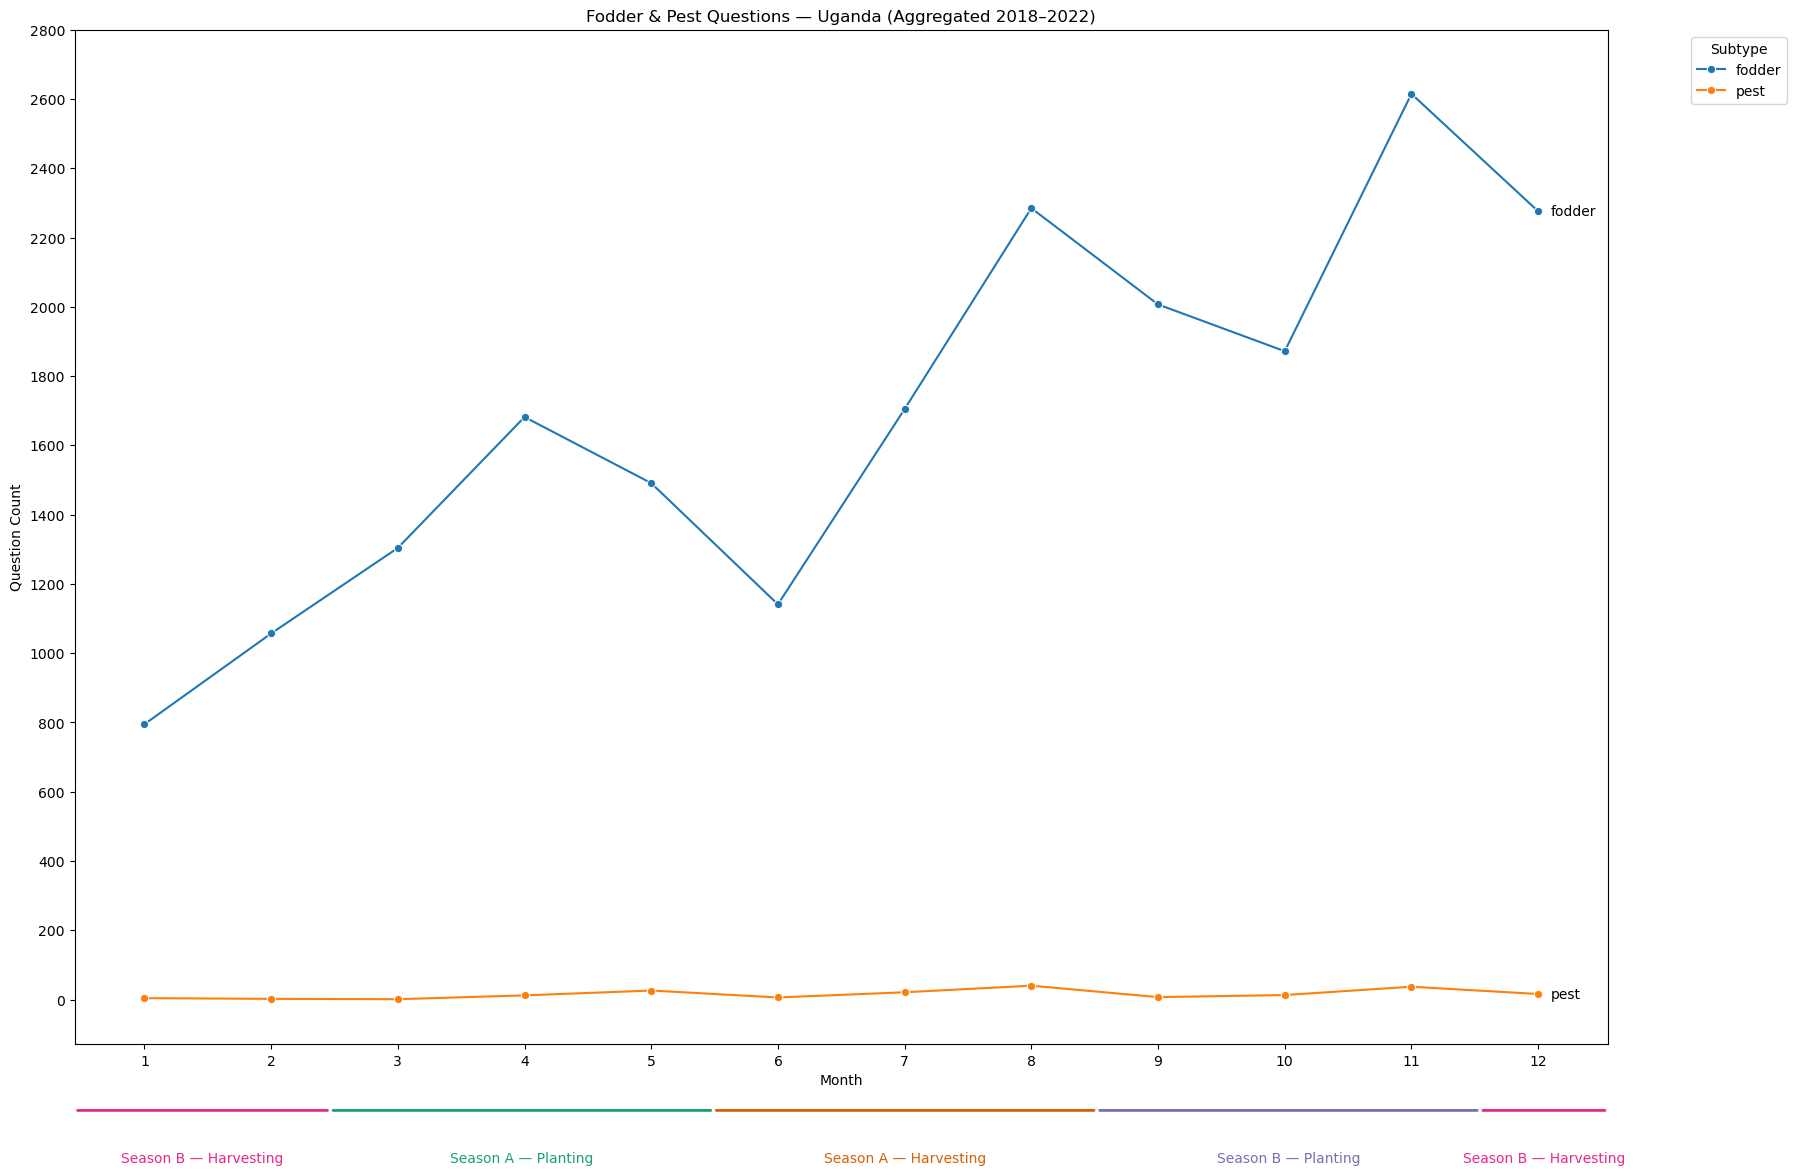

In [ ]:
# monthly uganda pest/fodder graph from Feb2018-Jun2022
# Filter Uganda pest/fodder data
df_uganda_ipf = df[
    (df['question_user_country_code'] == 'ug') &
    (df['topic_group'].isin(input_pest_fodder)) &
    (df['month'].notna())
].copy()
# Aggregate
monthly_uganda_ipf = (
    df_uganda_ipf.groupby(['topic_group', 'month'])
                 .size()
                 .reset_index(name='count')
)
# Plot
fig, ax = plt.subplots(figsize=(18, 14))
sns.lineplot(
    data=monthly_uganda_ipf,
    x='month',
    y='count',
    hue='topic_group',
    marker='o',
    ax=ax
)
plt.title("Fodder & Pest Questions — Uganda (Aggregated 2018–2022)")
plt.xlabel("Month")
plt.ylabel("Question Count")
plt.xticks(range(1, 13))
# Y-axis ticks every 5,000
plt.yticks(np.arange(0, monthly_uganda_ipf['count'].max() + 200, 200))
# --- Uganda seasonal brackets (all at same height) ---
add_season_bracket(ax, 3, 5,  "Season A — Planting",   y_offset=-0.065, color="#1b9e77")
add_season_bracket(ax, 6, 8,  "Season A — Harvesting", y_offset=-0.065, color="#d95f02")
add_season_bracket(ax, 9, 11, "Season B — Planting",   y_offset=-0.065, color="#7570b3")
# Season B Harvest spans Dec → Feb
add_season_bracket(ax, 12, 12, "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
add_season_bracket(ax, 1,  2,  "Season B — Harvesting", y_offset=-0.065, color="#e7298a")
# Direct labels
for tg in monthly_uganda_ipf['topic_group'].unique():
    tg_data = monthly_uganda_ipf[monthly_uganda_ipf['topic_group'] == tg]
    last_row = tg_data.sort_values("month").iloc[-1]
    plt.text(
        last_row['month'] + 0.1,
        last_row['count'],
        tg,
        fontsize=10,
        va='center'
    )
plt.legend(title="Subtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()